In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

### 累計レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta
from typing import List, Dict, Tuple, Optional, Callable

# サードパーティライブラリ
import polars as pl
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
import gamedata as g

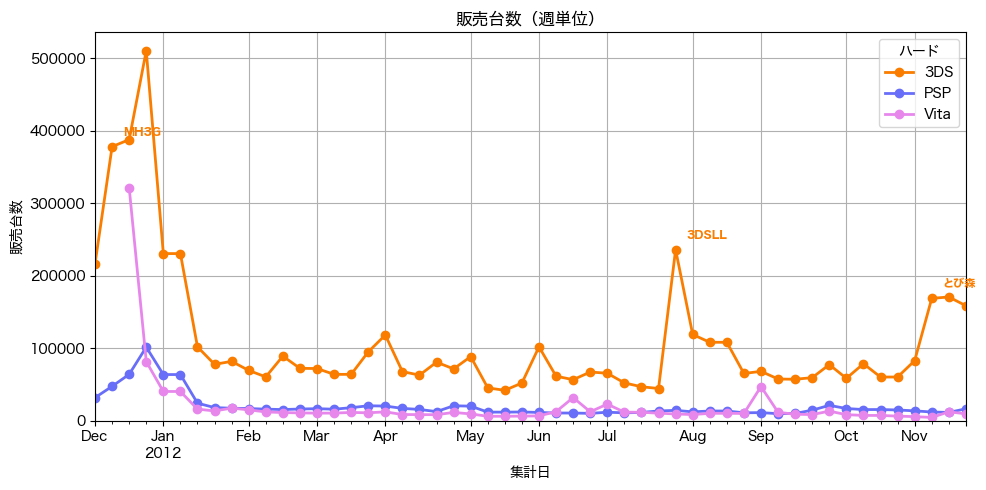

In [22]:

report_event_mask = g.EventMasks(hard=1.5, price=3, sale=2, soft=3, event=2)
(fig, df) = g.plot_sales(hw=['Vita', '3DS', 'PSP'], 
                         begin=datetime(2011, 12, 1), 
                         end=datetime(2012,11,30), 
                         event_mask=report_event_mask)

In [23]:
df = (df
 .filter(pl.col("report_date") < datetime(2012, 5, 13))
 .select(["report_date", "Vita", "PSP", "3DS"])
 .sort("report_date")
)
g.style(df, gradient_horizontal=True)

,Vita,PSP,3DS
report_date,,,
2011-12-04,nan,"31,560","216,350"
2011-12-11,nan,"47,238","378,114"
2011-12-18,"321,407","63,792","387,838"
2011-12-25,"81,387","101,370","510,629"
2012-01-01,"40,106","63,468","230,491"
2012-01-08,"40,107","63,469","230,491"
2012-01-15,"15,737","23,942","101,697"
2012-01-22,"13,221","17,874","77,519"
2012-01-29,"17,106","16,939","81,699"


In [24]:
g.date_filter(df, end=datetime(2012,5,13))

# df.loc[:datetime(2012,5,13), ['Vita', 'PSP', '3DS']]

report_date,Vita,PSP,3DS
date,i64,i64,i64
2011-12-04,null,"31,560","216,350"
2011-12-11,null,"47,238","378,114"
2011-12-18,"321,407","63,792","387,838"
2011-12-25,"81,387","101,370","510,629"
2012-01-01,"40,106","63,468","230,491"
2012-01-08,"40,107","63,469","230,491"
2012-01-15,"15,737","23,942","101,697"
2012-01-22,"13,221","17,874","77,519"
2012-01-29,"17,106","16,939","81,699"


## 各機種の累計

In [26]:
df = g.load_hard_sales()
# hw毎にグループ化しsum_unitsが最大の行を抽出
df = (df
      .group_by('hw').agg([pl.col('sum_units').max(), pl.last('report_date')])
      .sort('report_date', descending=True)
      .select(['hw', 'sum_units','report_date' ])
)
g.style(df, bar=True)

,sum_units,report_date
hw,,
XSX,"691,356",2026-02-01
PS4,"9,491,113",2026-02-01
NS2,"4,307,086",2026-02-01
NSW,"36,517,948",2026-02-01
PS5,"7,375,661",2026-02-01
3DS,"24,388,294",2024-03-31
XBOne,"113,823",2020-12-27
Vita,"5,823,705",2019-12-29
WiiU,"3,159,382",2017-12-31


In [19]:
dfm = g.load_hard_sales()
dfm = g.monthly_sales(dfm, begin=datetime(2001, 1, 1), end=datetime(2025,12,31), maker_mode=True)

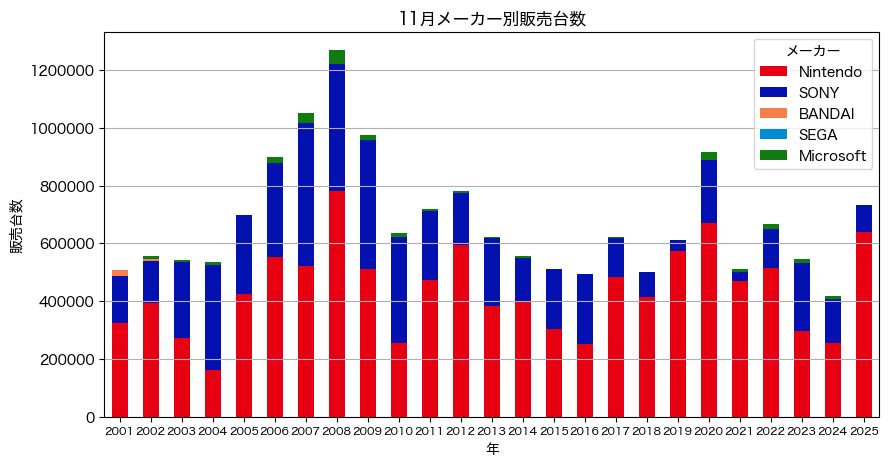

,Nintendo,SONY,BANDAI,SEGA,Microsoft
year,,,,,
2001,"323,033","162,300","22,203",850,nan
2002,"392,872","146,058","8,063",nan,"8,431"
2003,"272,547","261,970","1,514",nan,"7,187"
2004,"160,376","365,583",nan,nan,"8,211"
2005,"425,185","272,547",nan,nan,533
2006,"553,196","325,386",nan,nan,"21,771"
2007,"521,285","493,499",nan,nan,"35,065"
2008,"781,942","437,110",nan,nan,"49,901"
2009,"511,691","445,161",nan,nan,"19,131"


In [15]:
(fig, df) = g.plot_yearly_bar_by_month(11, 
                                        ticklabelsize=8,
                                        begin=datetime(2001,1,1), end=datetime(2025,12,31))
g.style(df)

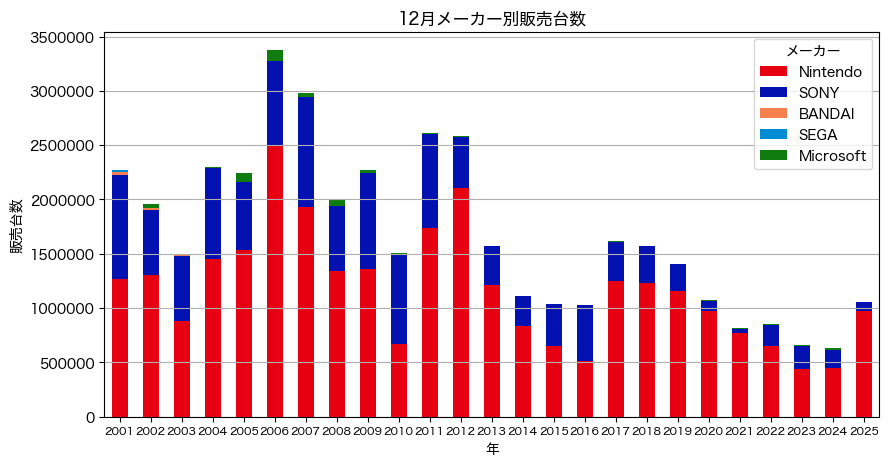

In [16]:
(fig, df) = g.plot_yearly_bar_by_month(12, 
                                        ticklabelsize=8,
                                        begin=datetime(2001,1,1), end=datetime(2025,12,31))


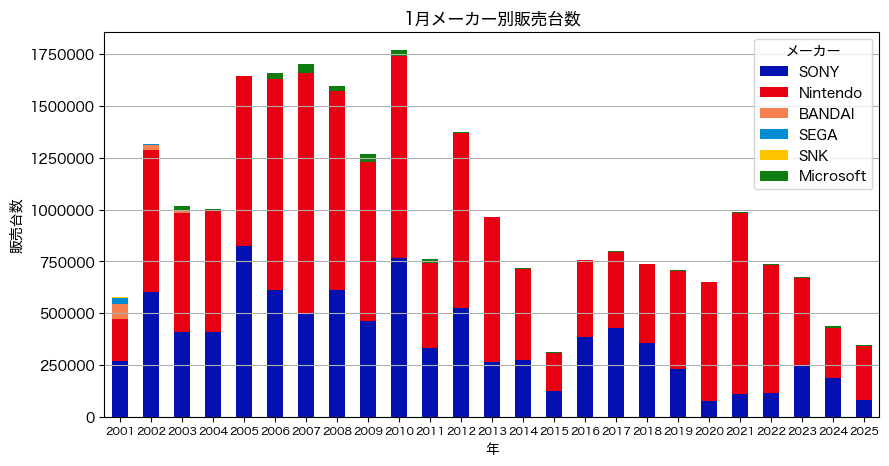

,SONY,Nintendo,BANDAI,SEGA,SNK,Microsoft
year,,,,,,
2001,"266,869","204,034","72,382","28,682","4,316",nan
2002,"603,446","684,041","24,171","4,206",nan,nan
2003,"410,138","572,266","12,800",nan,nan,"24,631"
2004,"408,650","589,946",600,nan,nan,"5,998"
2005,"824,172","819,650",nan,nan,nan,"3,082"
2006,"613,988","1,019,016",nan,nan,nan,"28,167"
2007,"500,494","1,161,584",nan,nan,nan,"43,700"
2008,"610,959","963,411",nan,nan,nan,"25,192"
2009,"463,620","767,174",nan,nan,nan,"39,305"


In [17]:
(fig, df) = g.plot_yearly_bar_by_month(1, 
                                        ticklabelsize=8,
                                        begin=datetime(2001,1,1), end=datetime(2025,12,31))
g.style(df)

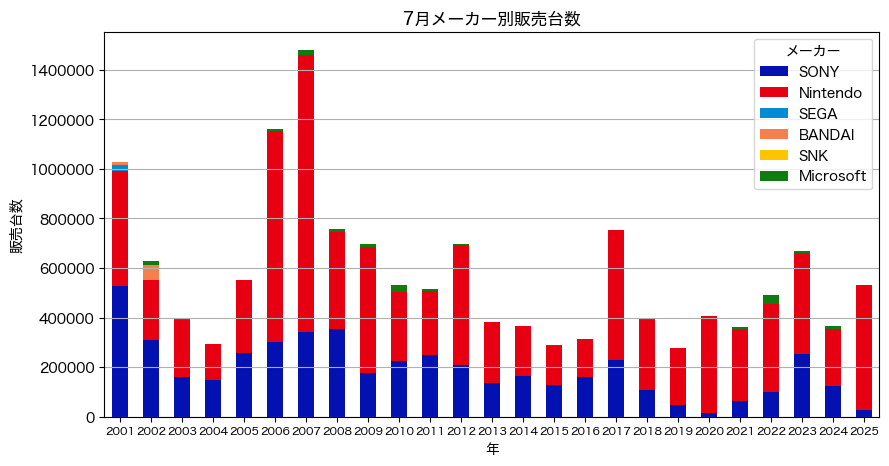

,SONY,Nintendo,SEGA,BANDAI,SNK,Microsoft
year,,,,,,
2001,"527,269","463,120","23,730","13,662","1,087",nan
2002,"309,707","243,582",nan,"60,390",nan,"15,334"
2003,"158,420","229,999",nan,"2,983",nan,"4,894"
2004,"147,086","144,891",nan,nan,nan,"1,389"
2005,"258,550","292,675",nan,nan,nan,"1,059"
2006,"302,354","851,824",nan,nan,nan,"6,717"
2007,"342,077","1,119,529",nan,nan,nan,"17,970"
2008,"354,101","389,490",nan,nan,nan,"14,439"
2009,"177,725","505,985",nan,nan,nan,"13,362"


In [18]:
(fig, df) = g.plot_yearly_bar_by_month(7, 
                                        ticklabelsize=8,
                                        begin=datetime(2001,1,1), end=datetime(2025,12,31))
g.style(df)